This is a jupyter notebook containing Julia code to compute the energy spectra of B8 decay, with new S, V, T interactions. 

In [1]:
using CSV
using DataFrames
using LaTeXStrings
using Plots
using ProgressMeter

include("amplitude_squared_library.jl")
# include("C_flux.jl")
include("kinematics.jl")

test_kinematics (generic function with 1 method)

In [2]:
MeV = 1
mu = 931.49410242 * MeV
M = 8.0246073 * mu
Mp = 8.00530510 * mu

7456.894488722747

$d{\Gamma}=\frac{1}{S}\frac{1}{2M}|{\cal M}|^{2}d{\Phi_{n}},$

In [3]:
P = [M, 0, 0, 0]
mass_list = [Mp, 0, 0, 0, 0]
prefactor = 1 / (2 * M) # for decay

6.689075628169564e-5

In [4]:
E_ν_max = (M^2 - Mp^2) / (2 * M) #see Appendix B and C

17.958261268788533

In [5]:
 num_plot_bar=100

100

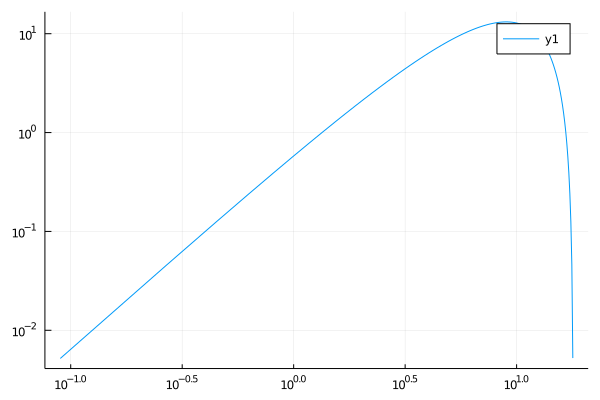

In [6]:
energy_list = (collect(1:num_plot_bar) .- (1 // 2)) * E_ν_max / num_plot_bar

flux_ν = [
    xx^2 * (M * (M - 2 * xx) - Mp^2)^2 / (M - 2 * xx)^2
    for xx ∈ energy_list
] * 1 / (8 * (2 * pi)^3) # see Appendix B

plot(energy_list,flux_ν,        xscale=:log10,yscale=:log10,)

In [7]:
# flux_ν...

# max(flux_ν)

# max(flux_ν...)

# compute S (1 and 3 anti-nu)

In [8]:
# single_flux_νbar_collect = [zeros(num_plot_bar) for _ ∈ mS_list]
# triple_flux_νbar_collect = [zeros(num_plot_bar) for _ ∈ mS_list]
flux_ν_max = max(flux_ν...)


single_weighted_sum = [zeros(num_plot_bar) for _ ∈ 1:Threads.nthreads()]
triple_weighted_sum = [zeros(num_plot_bar) for _ ∈ 1:Threads.nthreads()]


1-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [30]:
# Threads.nthreads()

In [31]:
# single_weighted_sum

In [32]:
num_points=10^6

pg = Progress(num_points; desc="Evaluating ...")
counter = Threads.Atomic{Int}(0)
ProgressMeter.update!(pg, counter[])
Threads.@threads for _ ∈ 1:num_points
    ρn, pi_list = Φ(P, mass_list)
    p1, p2, p3, p4, p5 = pi_list

    @assert p3[1] ≤ E_ν_max
    energy_bar_indices = [
        (Int ∘ floor)(first(p_νbar) / E_ν_max * num_plot_bar) + 1
        for p_νbar ∈ [p3, p4, p5]
    ]

    amplitude_squared = amp_sq_S(P, p2, p3, p4, p5, M)
    @assert amplitude_squared ≥ 0
    single_weighted_sum[Threads.threadid()][first(energy_bar_indices)] += ρn * amplitude_squared
    for energy_bar_index ∈ energy_bar_indices
        triple_weighted_sum[Threads.threadid()][energy_bar_index] += ρn * amplitude_squared
    end

    Threads.atomic_add!(counter, 1)
    ProgressMeter.update!(pg, counter[])
end

Evaluating ... 100%|█████████████████████████████████████| Time: 0:02:11:54


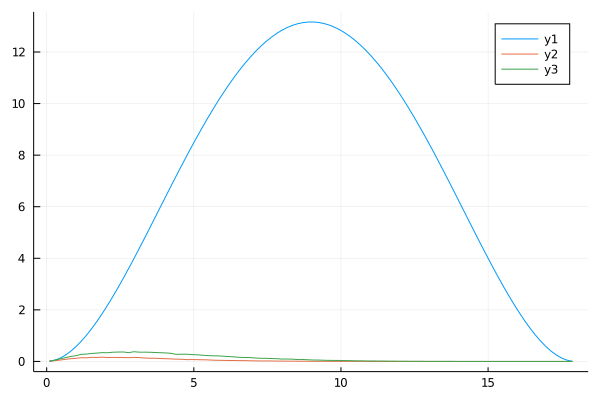

In [33]:
x = energy_list

## Single
y_νbar = sum(single_weighted_sum)  * prefactor / num_points
y_νbar /= (E_ν_max / num_plot_bar)


single_flux_νbar = copy(y_νbar)


## Triple
y_νbar = sum(triple_weighted_sum)  * prefactor / num_points
y_νbar /= (E_ν_max / num_plot_bar)

triple_flux_νbar = copy(y_νbar)
plot(x,[flux_ν, single_flux_νbar, triple_flux_νbar])

In [34]:
 CSV.write(
        "result/Contact_S.csv",
        DataFrame(
            "Energy"=>energy_list,
            "flux_ν"=>flux_ν,
            "1_antiν" => single_flux_νbar,
            "3_antiν" => triple_flux_νbar
        )
    )

"result/Contact_S.csv"

# compute V, T

In [35]:
# single_flux_νbar_collect = [zeros(num_plot_bar) for _ ∈ mS_list]
# triple_flux_νbar_collect = [zeros(num_plot_bar) for _ ∈ mS_list]
flux_ν_max = max(flux_ν...)


single_weighted_sum_V = [zeros(num_plot_bar) for _ ∈ 1:Threads.nthreads()]
triple_weighted_sum_T = [zeros(num_plot_bar) for _ ∈ 1:Threads.nthreads()]


1-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [36]:
single_weighted_sum=""
triple_weighted_sum=""

""

In [37]:
num_points=10^6

pg = Progress(num_points; desc="Evaluating ...")
counter = Threads.Atomic{Int}(0)
ProgressMeter.update!(pg, counter[])
Threads.@threads for _ ∈ 1:num_points
    ρn, pi_list = Φ(P, mass_list)
    p1, p2, p3, p4, p5 = pi_list

    @assert p3[1] ≤ E_ν_max
    energy_bar_indices = [
        (Int ∘ floor)(first(p_νbar) / E_ν_max * num_plot_bar) + 1
        for p_νbar ∈ [p3, p4, p5]
    ]

    amplitude_squared = amp_sq_V(P, p2, p3, p4, p5, M)
    @assert amplitude_squared ≥ 0
    single_weighted_sum_V[Threads.threadid()][first(energy_bar_indices)] += ρn * amplitude_squared
    
    amplitude_squared = amp_sq_T(P, p2, p3, p4, p5, M)
    @assert amplitude_squared ≥ 0
    for energy_bar_index ∈ energy_bar_indices
        triple_weighted_sum_T[Threads.threadid()][energy_bar_index] += ρn * amplitude_squared
    end

    Threads.atomic_add!(counter, 1)
    ProgressMeter.update!(pg, counter[])
end

Evaluating ... 100%|█████████████████████████████████████| Time: 0:02:35:26


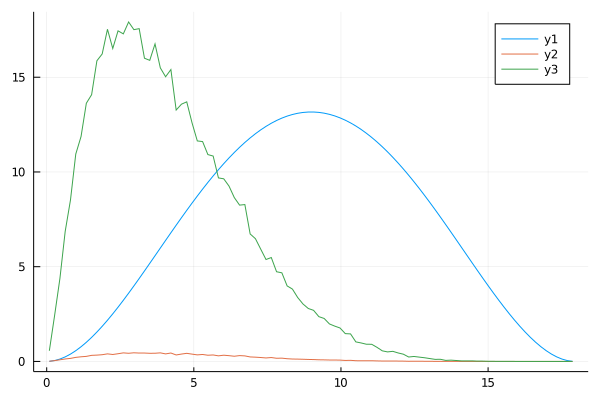

In [38]:
x = energy_list

## Single
y_νbar = sum(single_weighted_sum_V)  * prefactor / num_points
y_νbar /= (E_ν_max / num_plot_bar)


single_flux_νbar = copy(y_νbar)


## Triple
y_νbar = sum(triple_weighted_sum_T) * prefactor / num_points
y_νbar /= (E_ν_max / num_plot_bar)

triple_flux_νbar = copy(y_νbar)
plot(x,[flux_ν, single_flux_νbar, triple_flux_νbar])

In [39]:
 CSV.write(
        "result/Contact_VT.csv",
        DataFrame(
            "Energy"=>energy_list,
            "flux_ν"=>flux_ν,
            "1_antiν" => single_flux_νbar,
            "3_antiν" => triple_flux_νbar
        )
    )

"result/Contact_VT.csv"

# compute $\phi$ (wrong version, $\phi$ decay not treated properly)

In [19]:
# P = [M, 0, 0, 0]
# MS=1*MeV
# mass_list = [Mp, 0, 0, MS]
# prefactor = 1 / (2 * M) # for decay

In [20]:

# flux_ν_max = max(flux_ν...)


# single_weighted_sum = [zeros(num_plot_bar) for _ ∈ 1:Threads.nthreads()]
# triple_weighted_sum = [zeros(num_plot_bar) for _ ∈ 1:Threads.nthreads()]


In [21]:
# Threads.nthreads()

In [22]:
# single_weighted_sum

In [23]:
# num_points=10^5

# pg = Progress(num_points; desc="Evaluating ...")
# counter = Threads.Atomic{Int}(0)
# ProgressMeter.update!(pg, counter[])
# Threads.@threads for _ ∈ 1:num_points
#     ρn, pi_list = Φ(P, mass_list)
#     p1, p2, p3, p4 = pi_list

#     @assert p3[1] ≤ E_ν_max
#     energy_bar_indices = [
#         (Int ∘ floor)(first(p_νbar) / E_ν_max * num_plot_bar) + 1
#         for p_νbar ∈ [p3, p4]
#     ]

#     amplitude_squared = amp_sq_ϕ(P, p2, p3, p4, M)
#     @assert amplitude_squared ≥ 0
#     single_weighted_sum[Threads.threadid()][first(energy_bar_indices)] += ρn * amplitude_squared
#     for energy_bar_index ∈ energy_bar_indices
#         triple_weighted_sum[Threads.threadid()][energy_bar_index] += ρn * amplitude_squared
#     end

#     Threads.atomic_add!(counter, 1)
#     ProgressMeter.update!(pg, counter[])
# end

In [24]:
# x = energy_list

# ## Single
# y_νbar = sum(single_weighted_sum)  * prefactor / num_points
# y_νbar /= (E_ν_max / num_plot_bar)


# single_flux_νbar = copy(y_νbar)


# ## Triple
# y_νbar = sum(triple_weighted_sum)  * prefactor / num_points
# y_νbar /= (E_ν_max / num_plot_bar)

# triple_flux_νbar = copy(y_νbar)
# plot(x,[flux_ν, single_flux_νbar, triple_flux_νbar])

# Trash

In [50]:
ρn, pi_list = Φ(P, mass_list)
p1, p2, p3, p4, p5 = pi_list
p=P

p1, p2, p3, p4, p5

M

# function amp_sq_S(P, p2, p3, p4, p5, M)
#     q = p3 + p4 + p5
#     q2=scalar_product(q)

#     # expression automatically generated via xxx.nb
#     return (-4*(2*scalar_product(p,p2)*(q2*scalar_product(p,p3) - 2*scalar_product(p,q)*scalar_product(p3,q)) + M^2*(-(q2*scalar_product(p2,p3)) + 2*scalar_product(p2,q)*scalar_product(p3,q)))*scalar_product(p4,p5))/q2^2 # * g_eff^2 / MW^4 / Λ^4
# end


q = p3 + p4 + p5
q2=scalar_product(q)
scalar_product(q,p2)

amp_sq_S(P, p2, p3, p4, p5, M)

4-element Array{Float64,1}:
 7474.874374186479
    0.0
    0.0
    0.0

In [ ]:

# # for (mS_index, mS) ∈ enumerate(mS_list)





    

#     ## Triple
#     y_νbar = sum(triple_weighted_sum) * C_flux(MeV) * prefactor / num_points
#     y_νbar /= (E_ν_max / num_plot_bar)

#     scale_exponent = begin
#         flux_νbar_max = max(y_νbar...)
#         (Int ∘ floor ∘ log10)(flux_ν_max / flux_νbar_max)
#     end
#     y_ν = flux_ν / 10^scale_exponent

#     y_min = max(
#         min(filter(!iszero, y_νbar)...),
#         min(filter(!iszero, y_ν)...)
#     )
#     y_max = max(y_νbar..., y_ν...)
#     y_max = 10^((ceil ∘ log10)(y_max))

#     fig = plot(
#         x,
#         [y_ν y_νbar];

#         # title=L"Energy Spectrum of $\bar{\nu}_e$ from $^8\mathrm{B}$ Decay ($m_S$ = %$(mS / MeV) \mathrm{MeV})$",
#         xlabel=L"$E_{\bar{\nu}}~[\mathrm{MeV}]$",
#         # xticks=x,
#         ylabel=L"Flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]",
#         xscale=:log10,
#         yscale=:log10,
#         ylims=(y_min, y_max),

#         legend=:topleft,
#         label=[L"$\Phi_\nu / 10^%$scale_exponent$" L"$\Phi_{\bar{\nu}}$"],
#         minorgrid=true,
#         linewidth=3
#     )
# #     savefig(fig, "Triple_νbar_Energy_Spectrum_Four-Fermion_at_$(mS/MeV)MeV.pdf")

#     triple_flux_νbar_collect[mS_index] = copy(y_νbar)
# end